In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Conv1D,MaxPool1D,BatchNormalization,Dropout, Reshape, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.python.framework import ops

%matplotlib inline

In [3]:
X_train = np.array( h5py.File('MER_Dataset_FULL.h5', 'r')['X_train'] )
Y_train = np.array( h5py.File('MER_Dataset_FULL.h5', 'r')['Y_train'] )
X_test = np.array( h5py.File('MER_Dataset_FULL.h5', 'r')['X_test'] )
Y_test = np.array( h5py.File('MER_Dataset_FULL.h5', 'r')['Y_test'] )

In [4]:
mel_normalizer = preprocessing.Normalization(input_shape=[1292, 40])
mel_normalizer.adapt(X_train)

In [12]:
K.clear_session()

model = Sequential([
    mel_normalizer,
    Conv1D( filters=32, kernel_size=4, strides=1,input_shape=(1292,40) ,padding='valid', data_format='channels_last',
           activation='tanh'),
    MaxPool1D( pool_size=2, strides=2, padding='Valid', data_format='channels_last' ),
    BatchNormalization( axis=1, momentum=0.99, epsilon=0.001 ),
    
    Conv1D( filters=32, kernel_size=4, strides=1,padding='valid', data_format='channels_last',
           activation='tanh'),
    MaxPool1D( pool_size=2, strides=2, padding='Valid', data_format='channels_last' ),
    BatchNormalization( axis=1, momentum=0.99, epsilon=0.001 ),
    
    Conv1D( filters=16, kernel_size=4, strides=1,padding='valid', data_format='channels_last',
           activation='tanh'),
    MaxPool1D( pool_size=2, strides=2, padding='Valid', data_format='channels_last' ),
    BatchNormalization( axis=1, momentum=0.99, epsilon=0.001 ),
    
    Conv1D( filters=16, kernel_size=4, strides=1,padding='valid', data_format='channels_last',
           activation='tanh'),
    MaxPool1D( pool_size=2, strides=2, padding='Valid', data_format='channels_last' ),
    BatchNormalization( axis=1, momentum=0.99, epsilon=0.001 ),
    
    Conv1D( filters=8, kernel_size=4, strides=1,padding='valid', data_format='channels_last',
           activation='tanh'),
    MaxPool1D( pool_size=2, strides=2, padding='Valid', data_format='channels_last' ),
    BatchNormalization( axis=1, momentum=0.99, epsilon=0.001 ),
    
    Conv1D( filters=8, kernel_size=4, strides=1,padding='valid', data_format='channels_last',
           activation='tanh'),
    MaxPool1D( pool_size=2, strides=2, padding='Valid', data_format='channels_last' ),
    BatchNormalization( axis=1, momentum=0.99, epsilon=0.001 ),
    
    Flatten(),
    Dropout(0.5),
    Dense( 64, activation= 'tanh'),
    Dropout(0.5),
    Dense( 2, activation = None ) 
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 1292, 40)          81        
_________________________________________________________________
conv1d (Conv1D)              (None, 1289, 32)          5152      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 644, 32)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 644, 32)           2576      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 641, 32)           4128      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 320, 32)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 320, 32)           1

In [14]:
model.compile(loss="mean_squared_error",
                optimizer=tf.keras.optimizers.Adam(0.001))

history = model.fit(
    X_train, Y_train,
    epochs=30,
    verbose=2,
    # Calculate validation results on 10% of the training data
#     validation_split = 0.25             # This is droppped after we settled on the hyper-parameters above.
    )


Epoch 1/30
377/377 - 17s - loss: 0.6387
Epoch 2/30
377/377 - 18s - loss: 0.1769
Epoch 3/30
377/377 - 18s - loss: 0.1384
Epoch 4/30
377/377 - 18s - loss: 0.1337
Epoch 5/30
377/377 - 18s - loss: 0.1309
Epoch 6/30
377/377 - 18s - loss: 0.1273
Epoch 7/30
377/377 - 18s - loss: 0.1249
Epoch 8/30
377/377 - 18s - loss: 0.1229
Epoch 9/30
377/377 - 17s - loss: 0.1211
Epoch 10/30
377/377 - 18s - loss: 0.1192
Epoch 11/30
377/377 - 19s - loss: 0.1183
Epoch 12/30
377/377 - 18s - loss: 0.1177
Epoch 13/30
377/377 - 19s - loss: 0.1172
Epoch 14/30
377/377 - 19s - loss: 0.1163
Epoch 15/30
377/377 - 19s - loss: 0.1148
Epoch 16/30
377/377 - 20s - loss: 0.1153
Epoch 17/30
377/377 - 20s - loss: 0.1142
Epoch 18/30
377/377 - 20s - loss: 0.1137
Epoch 19/30
377/377 - 20s - loss: 0.1130
Epoch 20/30
377/377 - 20s - loss: 0.1136
Epoch 21/30
377/377 - 19s - loss: 0.1111
Epoch 22/30
377/377 - 20s - loss: 0.1117
Epoch 23/30
377/377 - 19s - loss: 0.1104
Epoch 24/30
377/377 - 19s - loss: 0.1098
Epoch 25/30
377/377 - 19s

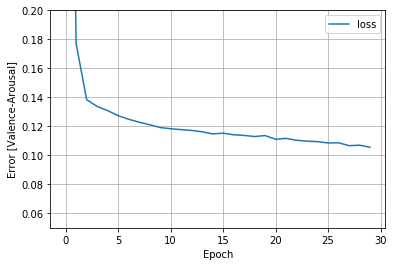

In [15]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
#     plt.plot(history.history['val_loss'], label='val_loss')

    plt.ylim([.05, .2])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Valence-Arousal]')
    plt.legend()
    plt.grid(True)

plot_loss(history)  

In [16]:
model.evaluate(X_test, Y_test, verbose = 1 )

95/95 [==============================] - 2s 18ms/step - loss: 0.1104


0.11036162823438644

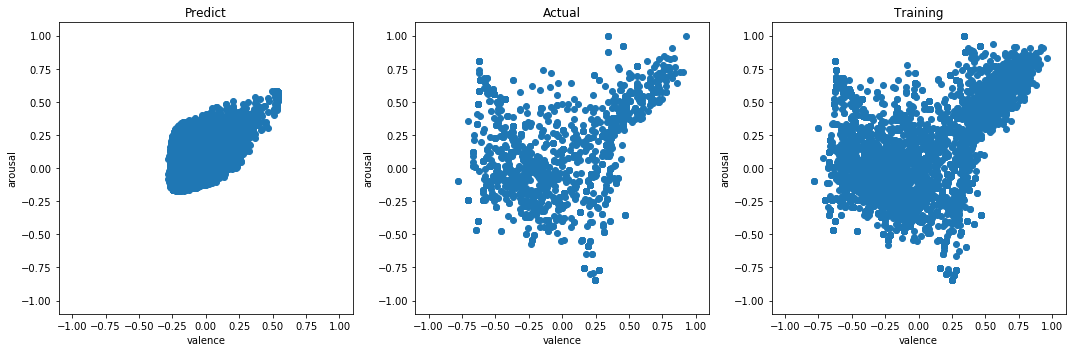

In [17]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.title('Predict')
predictions = model.predict( X_test )
plt.scatter( predictions[ : , 0], predictions[: , 1]  )
plt.xlabel('valence')
plt.ylabel('arousal')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.subplot(132)
plt.title('Actual')
plt.scatter( Y_test[:, 0], Y_test[:, 1] )
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('valence')
plt.ylabel('arousal')

plt.subplot(133)
plt.title('Training')
plt.scatter( Y_train[:, 0], Y_train[:, 1] )
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('valence')
plt.ylabel('arousal')

plt.tight_layout()

In [18]:
from sklearn.metrics import r2_score

valence_score =  r2_score( Y_test[0], predictions[0] )
arousal_score =  r2_score( Y_test[1], predictions[1] )
print( "Valence: ", valence_score, "| Arousal: ", arousal_score )

Valence:  0.9811595833935869 | Arousal:  0.17344585607689422
